In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import style
plt.style.use('seaborn-v0_8')

In [17]:
pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams["figure.figsize"] = [5,3]

0 0.4646078518951496
1 0.2600235812550835
2 0.3468106976158609
3 0.5361339798802187
4 0.4801336985224951
5 0.053408318018538375
6 0.3425132626288384
7 0.17729641875534533
8 0.18451717223096634
9 0.2615897752907559


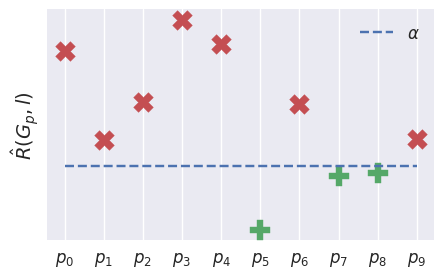

In [21]:
seed = 0
alpha = 0.2
np.random.seed(seed)
n_prompts = 10
R = np.random.normal(0.2, 0.15, n_prompts)

# colors = []
# markers = []
above = []
below = []
for k, r in enumerate(R):
    print(k, r)
    if r < alpha:
        below.append((k,r))
    else:
        above.append((k,r))
    
below = np.array(below)
above = np.array(above)

plt.scatter(below[:, 0], below[:, 1], color=pal[1], marker="P", s=200)
plt.scatter(above[:, 0], above[:, 1], color=pal[2], marker="X", s=200)

labels = [r"$p_{}$".format(i) for i in np.arange(R.shape[0])]
plt.xticks(np.arange(R.shape[0]), labels=labels, fontsize=12)
plt.yticks([])

plt.ylabel(
    r"$\hat{R}(G_p, l)$", 
    fontsize=14, 
    # rotation="horizontal"
)
plt.plot([0, R.shape[0]-1], [alpha, alpha], "--", label=r"$\alpha$")


plt.legend(fontsize=12)
plt.savefig("../plots/figures/figure_2.png", dpi=1200, bbox_inches="tight")
# plt.title(r"Controlling Prompt Risk", fontsize=16)
plt.show()

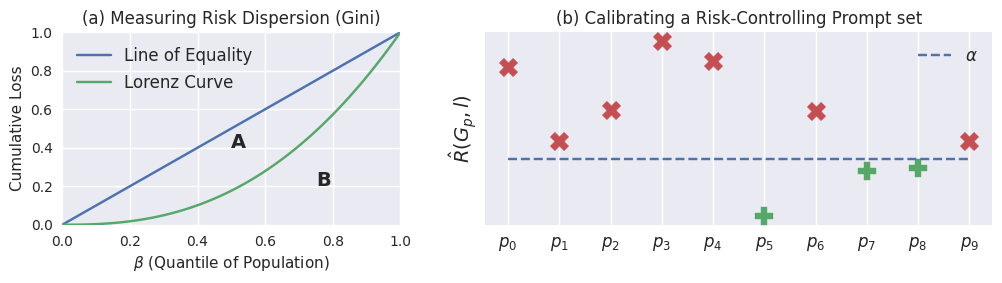

In [57]:
plt.rcParams["figure.figsize"] = [12,2.5]

seed = 0
alpha = 0.21
np.random.seed(seed)
n_prompts = 10
R = np.random.normal(0.2, 0.15, n_prompts)

fig, axs = plt.subplots(1,2, width_ratios=[0.4, 0.6])

above = []
below = []
for k, r in enumerate(R):
    if r < alpha:
        below.append((k,r))
    else:
        above.append((k,r))
    
below = np.array(below)
above = np.array(above)

axs[1].scatter(below[:, 0], below[:, 1], color=pal[1], marker="P", s=175)
axs[1].scatter(above[:, 0], above[:, 1], color=pal[2], marker="X", s=175)

labels = [r"$p_{}$".format(i) for i in np.arange(R.shape[0])]
axs[1].set_xticks(np.arange(R.shape[0]), labels=labels, fontsize=12)
axs[1].set_yticks([])

axs[1].set_ylabel(
    r"$\hat{R}(G_p, l)$", 
    fontsize=14, 
    # rotation="horizontal"
)
axs[1].plot([0, R.shape[0]-1], [alpha, alpha], "--", label=r"$\alpha$")





axs[0].plot([0,1], [0,1], label="Line of Equality")
lorenz = np.arange(101)/100
axs[0].plot(lorenz, lorenz**2.5, label="Lorenz Curve")

axs[0].text(0.5, 0.4, "A", fontsize=14, fontweight="bold")
axs[0].text(0.75, 0.2, "B", fontsize=14, fontweight="bold")

axs[0].set_xlim(0.0,1.0)
axs[0].set_ylim(0.0,1.0)

axs[0].set_xlabel(r"$\beta$ (Quantile of Population)")
axs[0].set_ylabel("Cumulative Loss")

axs[0].set_title("(a) Measuring Risk Dispersion (Gini)")
axs[1].set_title("(b) Calibrating a Risk-Controlling Prompt set")

axs[0].legend(fontsize=12)
axs[1].legend(fontsize=12)

plt.savefig("../plots/figures/figure_2.png", dpi=1200, bbox_inches="tight")
plt.show()